In [44]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
import xgboost as xgb
import matplotlib.ticker

matplotlib.rcParams.update({'font.size': 16})

pd.options.display.max_columns = 100

In [45]:
df = pd.read_csv('data/counties_US.csv')
# renames = {} 
# for col in df.columns:
#     renames[col] = col.replace('-', '_')
# df = df.rename(columns = renames)
df= df.rename(columns = lambda x: x.lower().replace('-','_'))    
df_16 = df[df.year == 2016]
df_16.reset_index(inplace = True)
df_16.head(10)

,index,geoid,year,name,parent_location,population,poverty_rate,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,renter_occupied_households,eviction_filings,evictions,eviction_rate,eviction_filing_rate,imputed,subbed
0,50273,1001,2016,Autauga County,Alabama,55221.0,9.28,26.08,883.0,51281.0,141300.0,32.8,75.78,18.54,2.61,0.42,0.97,0.01,1.53,0.14,5374.0,154.0,116.0,2.16,2.87,0.0,0.0
1,50274,1003,2016,Baldwin County,Alabama,195121.0,9.63,28.48,879.0,50254.0,169300.0,30.3,83.10,9.50,4.50,0.56,0.66,0.00,1.58,0.10,23940.0,776.0,504.0,2.11,3.24,0.0,0.0
2,50275,1005,2016,Barbour County,Alabama,26932.0,19.54,36.41,579.0,32964.0,92200.0,30.3,46.24,46.71,4.61,0.19,0.44,0.00,1.31,0.50,3339.0,40.0,21.0,0.63,1.20,0.0,0.0
3,50276,1007,2016,Bibb County,Alabama,22604.0,12.84,24.89,651.0,38678.0,102700.0,26.9,74.50,21.40,2.22,0.41,0.09,0.00,1.37,0.00,2104.0,29.0,18.0,0.86,1.38,0.0,0.0
4,50277,1009,2016,Blount County,Alabama,57710.0,12.26,21.10,601.0,45813.0,119800.0,26.1,87.85,1.53,8.63,0.31,0.14,0.00,1.46,0.07,4559.0,72.0,47.0,1.03,1.58,0.0,0.0
5,50278,1011,2016,Bullock County,Alabama,10678.0,22.72,29.16,570.0,31938.0,68600.0,30.3,22.21,70.71,4.43,1.16,0.21,0.00,1.28,0.00,1220.0,31.0,11.0,0.90,2.54,0.0,0.0
6,50279,1013,2016,Butler County,Alabama,20354.0,20.55,29.94,575.0,32229.0,78900.0,30.9,53.34,43.84,1.18,0.06,0.40,0.00,1.07,0.11,2725.0,57.0,32.0,1.17,2.09,0.0,0.0
7,50280,1015,2016,Calhoun County,Alabama,116648.0,16.49,30.95,637.0,41703.0,105900.0,31.1,73.03,20.32,3.49,0.19,0.86,0.01,2.09,0.02,15268.0,507.0,305.0,2.00,3.32,0.0,0.0
8,50281,1017,2016,Chambers County,Alabama,34079.0,17.17,32.41,658.0,34177.0,80800.0,32.3,57.28,40.28,0.45,0.17,0.76,0.03,1.03,0.00,4384.0,162.0,87.0,1.98,3.70,0.0,0.0
9,50282,1019,2016,Cherokee County,Alabama,26008.0,15.07,22.32,621.0,36296.0,105100.0,30.2,91.72,4.75,1.50,0.55,0.28,0.02,1.18,0.00,2445.0,43.0,33.0,1.35,1.76,0.0,0.0


In [3]:
df_16eel = pd.read_csv('data/EmployEducationLanguage/ACS_16_5YR_B16010/ACS_16_5YR_B16010_with_ann.csv',\
                       encoding = "ISO-8859-1", header=[0,1])

In [ ]:
df_16eel.columns = df_16eel.columns.droplevel(0)

renames = {}
for col in df_16eel.columns:
    replaces = [(";",""), ("-",""), (":",""), ("Estimate ",""), ("'s degree",""), (" graduate",""),(" ","_"),("__","_") ]
    t = col
    for word, new_word in replaces:
        renames[col] = t.replace(word, new_word)
        t = renames[col]
       

In [ ]:
df_16eel = df_16eel.rename(columns = renames)

drops = ['Id']
for col in df_16eel.columns:
    if 'Margin' in col:
        drops.append(col)
        
df_16eel.drop(columns = drops, inplace = True)

In [8]:
df_16eel.columns

Index(['Id2', 'Geography', 'Total', 'Less_than_high_school',
       'Less_than_high_school_In_labor_force',
       'Less_than_high_school_In_labor_force_Speak_only_English',
       'Less_than_high_school_In_labor_force_Speak_Spanish',
       'Less_than_high_school_In_labor_force_Speak_other_IndoEuropean_languages',
       'Less_than_high_school_In_labor_force_Speak_Asian_and_Pacific_Island_languages',
       'Less_than_high_school_In_labor_force_Speak_other_languages',
       'Less_than_high_school_Not_in_labor_force',
       'Less_than_high_school_Not_in_labor_force_Speak_only_English',
       'Less_than_high_school_Not_in_labor_force_Speak_Spanish',
       'Less_than_high_school_Not_in_labor_force_Speak_other_IndoEuropean_languages',
       'Less_than_high_school_Not_in_labor_force_Speak_Asian_and_Pacific_Island_languages',
       'Less_than_high_school_Not_in_labor_force_Speak_other_languages',
       'High_school_(includes_equivalency)',
       'High_school_(includes_equivalency)_I

In [9]:
#del df_16eel_pct
list_pct=[]
for col in df_16eel.columns:
    if 'Speak' not in col:
        list_pct.append(col)
df_16eel_pct = df_16eel[list_pct]

df_16eel_pct.columns

Index(['Id2', 'Geography', 'Total', 'Less_than_high_school',
       'Less_than_high_school_In_labor_force',
       'Less_than_high_school_Not_in_labor_force',
       'High_school_(includes_equivalency)',
       'High_school_(includes_equivalency)_In_labor_force',
       'High_school_(includes_equivalency)_Not_in_labor_force',
       'Some_college_or_associate', 'Some_college_or_associate_In_labor_force',
       'Some_college_or_associate_Not_in_labor_force', 'Bachelor_or_higher',
       'Bachelor_or_higher_In_labor_force',
       'Bachelor_or_higher_Not_in_labor_force'],
      dtype='object')

In [10]:
df_16eel_pct = df_16eel_pct.assign(In_labor_force = df_16eel[['Less_than_high_school_In_labor_force',\
                                           'High_school_(includes_equivalency)_In_labor_force',\
                                           'Some_college_or_associate_In_labor_force',\
                                           'Bachelor_or_higher_In_labor_force']].sum(axis = 1).values)

In [11]:
list_english = []
for col in df_16eel.columns:
    if 'Speak_only_English' in col:
        list_english.append(col)
        
df_16eel_pct = df_16eel_pct.assign(Speak_only_English = df_16eel[list_english].sum(axis = 1))

In [12]:
df_16eel_pct.columns.size

17

In [13]:
df_16eel_pct.shape

(3142, 17)

In [14]:
df_16eel_pct.head()

,Id2,Geography,Total,Less_than_high_school,Less_than_high_school_In_labor_force,Less_than_high_school_Not_in_labor_force,High_school_(includes_equivalency),High_school_(includes_equivalency)_In_labor_force,High_school_(includes_equivalency)_Not_in_labor_force,Some_college_or_associate,Some_college_or_associate_In_labor_force,Some_college_or_associate_Not_in_labor_force,Bachelor_or_higher,Bachelor_or_higher_In_labor_force,Bachelor_or_higher_Not_in_labor_force,In_labor_force,Speak_only_English
0,1001,"Autauga County, Alabama",36466,4528,1715,2813,12519,7050,5469,10451,6950,3501,8968,6705,2263,22420,35251
1,1003,"Baldwin County, Alabama",139946,13956,5694,8262,40154,21785,18369,44486,27521,16965,41350,26591,14759,81591,132630
2,1005,"Barbour County, Alabama",18387,4824,1477,3347,6422,2944,3478,4775,2941,1834,2366,1569,797,8931,17391
3,1007,"Bibb County, Alabama",15750,3040,710,2330,6586,3184,3402,4234,2748,1486,1890,1341,549,7983,15362
4,1009,"Blount County, Alabama",39472,7882,2663,5219,13003,6131,6872,13436,8025,5411,5151,3490,1661,20309,37036


In [15]:
df_16eel_pct.Total =df_16eel_pct.Total.astype(int,copy=False)

In [16]:
#del df_16eel_pct2
df_16eel_pct2 = df_16eel_pct.copy()

In [17]:
for i in range(3,17):
    df_16eel_pct2.iloc[:,i] = 100* df_16eel_pct.iloc[:,i] / df_16eel_pct.iloc[:,2].astype(int)

In [18]:
df_16eel_pct2.shape

(3142, 17)

In [19]:
df_16.shape

(3142, 27)

In [47]:
df_16_v2 = pd.merge(df_16, df_16eel_pct2, how = 'inner', left_on= 'geoid', right_on= 'Id2')

In [48]:
df_16_v2.head()

,index,geoid,year,name,parent_location,population,poverty_rate,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,renter_occupied_households,eviction_filings,evictions,eviction_rate,eviction_filing_rate,imputed,subbed,Id2,Geography,Total,Less_than_high_school,Less_than_high_school_In_labor_force,Less_than_high_school_Not_in_labor_force,High_school_(includes_equivalency),High_school_(includes_equivalency)_In_labor_force,High_school_(includes_equivalency)_Not_in_labor_force,Some_college_or_associate,Some_college_or_associate_In_labor_force,Some_college_or_associate_Not_in_labor_force,Bachelor_or_higher,Bachelor_or_higher_In_labor_force,Bachelor_or_higher_Not_in_labor_force,In_labor_force,Speak_only_English
0,50273,1001,2016,Autauga County,Alabama,55221.0,9.28,26.08,883.0,51281.0,141300.0,32.8,75.78,18.54,2.61,0.42,0.97,0.01,1.53,0.14,5374.0,154.0,116.0,2.16,2.87,0.0,0.0,1001,"Autauga County, Alabama",36466,12.417046,4.703011,7.714035,34.330609,19.333077,14.997532,28.659573,19.058849,9.600724,24.592771,18.386991,6.205781,61.481928,96.668129
1,50274,1003,2016,Baldwin County,Alabama,195121.0,9.63,28.48,879.0,50254.0,169300.0,30.3,83.10,9.50,4.50,0.56,0.66,0.00,1.58,0.10,23940.0,776.0,504.0,2.11,3.24,0.0,0.0,1003,"Baldwin County, Alabama",139946,9.972418,4.068712,5.903706,28.692496,15.566719,13.125777,31.787975,19.665442,12.122533,29.547111,19.000900,10.546211,58.301774,94.772269
2,50275,1005,2016,Barbour County,Alabama,26932.0,19.54,36.41,579.0,32964.0,92200.0,30.3,46.24,46.71,4.61,0.19,0.44,0.00,1.31,0.50,3339.0,40.0,21.0,0.63,1.20,0.0,0.0,1005,"Barbour County, Alabama",18387,26.235928,8.032849,18.203078,34.926850,16.011312,18.915538,25.969435,15.994996,9.974438,12.867787,8.533203,4.334584,48.572361,94.583129
3,50276,1007,2016,Bibb County,Alabama,22604.0,12.84,24.89,651.0,38678.0,102700.0,26.9,74.50,21.40,2.22,0.41,0.09,0.00,1.37,0.00,2104.0,29.0,18.0,0.86,1.38,0.0,0.0,1007,"Bibb County, Alabama",15750,19.301587,4.507937,14.793651,41.815873,20.215873,21.600000,26.882540,17.447619,9.434921,12.000000,8.514286,3.485714,50.685714,97.536508
4,50277,1009,2016,Blount County,Alabama,57710.0,12.26,21.10,601.0,45813.0,119800.0,26.1,87.85,1.53,8.63,0.31,0.14,0.00,1.46,0.07,4559.0,72.0,47.0,1.03,1.58,0.0,0.0,1009,"Blount County, Alabama",39472,19.968585,6.746555,13.222031,32.942339,15.532529,17.409809,34.039319,20.330867,13.708452,13.049757,8.841711,4.208046,51.451662,93.828537


In [39]:
df_16_v2.to_csv('2016_eviction_Labor_Eduation_Language.csv')

In [23]:
df_16_v2.describe()

,index,GEOID,year,population,poverty_rate,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,renter_occupied_households,eviction_filings,evictions,eviction_rate,eviction_filing_rate,imputed,subbed,Id2,Total,Less_than_high_school,Less_than_high_school_In_labor_force,Less_than_high_school_Not_in_labor_force,High_school_(includes_equivalency),High_school_(includes_equivalency)_In_labor_force,High_school_(includes_equivalency)_Not_in_labor_force,Some_college_or_associate,Some_college_or_associate_In_labor_force,Some_college_or_associate_Not_in_labor_force,Bachelor_or_higher,Bachelor_or_higher_In_labor_force,Bachelor_or_higher_Not_in_labor_force,In_labor_force,Speak_only_English
count,3140.000000,3140.000000,3140.0,3.140000e+03,3140.000000,3140.000000,3139.000000,3139.000000,3138.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,2709.000000,2497.000000,2497.00000,2709.000000,2919.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,51843.706369,30387.632484,2016.0,1.007939e+05,12.197656,28.588354,700.815228,46839.651481,133655.672403,28.512325,77.331264,8.884411,8.830876,1.710000,1.259726,0.088436,1.807061,0.088287,1.444454e+04,867.494278,359.823388,1.59032,3.080391,0.031860,0.091720,30387.632484,6.803769e+04,14.184724,5.281898,8.902826,34.577763,18.862953,15.714810,30.433068,20.004338,10.428730,20.804445,14.842874,5.961571,58.992063,90.946840
std,906.936646,15156.372045,0.0,3.231294e+05,5.740339,8.156487,191.686390,12248.703074,77998.160895,4.566691,19.839194,14.392514,13.498385,6.994687,2.659393,0.742862,1.698914,0.162668,5.553816e+04,4325.950560,1302.992636,1.92601,4.942215,0.175658,0.288676,15156.372045,2.172006e+05,6.541087,2.960909,4.701178,7.071038,4.139010,4.638915,5.124294,4.331070,2.825057,9.139914,7.359373,2.652816,8.270783,12.056646
min,50273.000000,1001.000000,2016.0,8.500000e+01,0.000000,7.350000,275.000000,19328.000000,32300.000000,10.000000,0.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1001.000000,6.700000e+01,1.278772,0.000000,0.511509,6.464408,4.341767,2.122642,11.277873,3.264049,0.000000,2.985075,2.266737,0.000000,15.796767,2.976002
25%,51058.750000,18178.500000,2016.0,1.103000e+04,8.090000,23.070000,579.000000,38827.500000,86425.000000,26.000000,65.655000,0.560000,1.880000,0.120000,0.240000,0.000000,0.970000,0.000000,1.182000e+03,4.000000,3.000000,0.27000,0.390000,0.000000,0.000000,18178.500000,7.575500e+03,9.271687,3.378074,5.469484,30.150069,16.063134,12.570845,26.913095,16.955956,8.568007,14.432249,9.839147,4.161797,53.628362,89.937641
50%,51843.500000,29176.000000,2016.0,2.579300e+04,11.310000,27.295000,653.000000,45114.000000,111950.000000,28.800000,84.655000,2.095000,3.740000,0.260000,0.540000,0.000000,1.470000,0.030000,2.890000e+03,40.000000,28.000000,1.05000,1.570000,0.000000,0.000000,29176.000000,1.767500e+04,12.741842,4.587949,7.811139,34.926543,18.771539,15.556822,30.485538,19.944615,10.006300,18.553528,13.041153,5.318750,59.713344,95.351579
75%,52628.250000,45079.500000,2016.0,6.762050e+04,15.090000,32.475000,773.000000,52250.000000,155800.000000,31.200000,93.345000,10.202500,9.020000,0.610000,1.200000,0.050000,2.110000,0.110000,8.163000e+03,267.000000,159.000000,2.19000,3.820000,0.000000,0.000000,45079.500000,4.563975e+04,18.277953,6.410910,11.632338,39.601279,21.580753,18.642122,33.915406,22.986170,11.831232,24.709292,17.675785,7.071040,64.816684,97.437211
max,53414.000000,56045.000000,2016.0,1.003839e+07,44.320000,96.300000,1827.000000,123453.000000,902500.000000,50.000000,99.760000,85.950000,98.710000,81.510000,41.640000,35.290000,23.45000

In [24]:
df_16_v2.dropna(how = 'any', inplace = True)

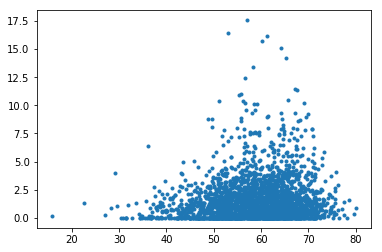

In [38]:
plt.plot(df_16_v2.In_labor_force, df_16_v2.eviction_rate, '.')

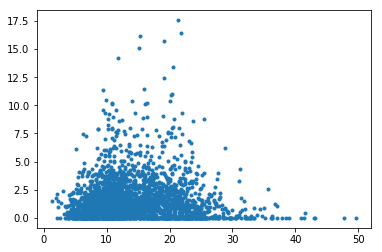

In [26]:
plt.plot(df_16_v2.Less_than_high_school, df_16_v2.eviction_rate, '.')

In [27]:
df_16_v2.GEOID.dtype

dtype('int64')

In [28]:
df_crime = pd.read_csv('data/crime_data_w_population_and_crime_rate.csv')
df_crime.head()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,100.0,5706,22329,119,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,100.0,873,3424,8,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,100.0,127,278,1,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,100.0,6,13,0,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,100.0,392,703,3,4,17,368,149,494,60,0,27083,22,31


In [29]:
df_crime.FIPS_CTY.dtype

dtype('int64')

In [30]:
df_crime.FIPS_ST.dtype

dtype('int64')

In [31]:
df_crime.FIPS_CTY = df_crime.FIPS_CTY.astype(str)
df_crime.FIPS_ST = df_crime.FIPS_ST.astype(str)

In [32]:
df_crime.FIPS_CTY = df_crime.FIPS_CTY.str.zfill(3)

In [33]:
df_crime = df_crime.assign(FIPS = df_crime.FIPS_ST + df_crime.FIPS_CTY)
df_crime.to_csv('crime_rate_with_FIPS.csv')

In [34]:
df_crime.FIPS = df_crime.FIPS.astype('int64')

In [35]:
df_16_all = pd.merge(df_16_v2, df_crime, left_on = 'GEOID', right_on= 'FIPS')
df_16_all.head()

,index_x,GEOID,year,name,parent_location,population_x,poverty_rate,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,renter_occupied_households,eviction_filings,evictions,eviction_rate,eviction_filing_rate,imputed,subbed,Id2,Geography,Total,Less_than_high_school,Less_than_high_school_In_labor_force,Less_than_high_school_Not_in_labor_force,High_school_(includes_equivalency),High_school_(includes_equivalency)_In_labor_force,High_school_(includes_equivalency)_Not_in_labor_force,Some_college_or_associate,Some_college_or_associate_In_labor_force,Some_college_or_associate_Not_in_labor_force,Bachelor_or_higher,Bachelor_or_higher_In_labor_force,Bachelor_or_higher_Not_in_labor_force,In_labor_force,Speak_only_English,county_name,crime_rate_per_100000,index_y,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population_y,FIPS_ST,FIPS_CTY,FIPS
0,50273,1001,2016,Autauga County,Alabama,55221.0,9.28,26.08,883.0,51281.0,141300.0,32.8,75.78,18.54,2.61,0.42,0.97,0.01,1.53,0.14,5374.0,154.0,116.0,2.16,2.87,0.0,0.0,1001,"Autauga County, Alabama",36466,12.417046,4.703011,7.714035,34.330609,19.333077,14.997532,28.659573,19.058849,9.600724,24.592771,18.386991,6.205781,61.481928,96.668129,"Autauga County, AL",251.601926,1136,1,4,1,57161,54604,3,3,100.0000,139,1765,3,15,34,87,447,1233,85,108,55246,1,001,1001
1,50274,1003,2016,Baldwin County,Alabama,195121.0,9.63,28.48,879.0,50254.0,169300.0,30.3,83.10,9.50,4.50,0.56,0.66,0.00,1.58,0.10,23940.0,776.0,504.0,2.11,3.24,0.0,0.0,1003,"Baldwin County, Alabama",139946,9.972418,4.068712,5.903706,28.692496,15.566719,13.125777,31.787975,19.665442,12.122533,29.547111,19.000900,10.546211,58.301774,94.772269,"Baldwin County, AL",228.086325,1298,1,4,2,187467,187467,14,14,100.0000,446,4988,8,30,76,332,967,3829,192,31,195540,1,003,1003
2,50275,1005,2016,Barbour County,Alabama,26932.0,19.54,36.41,579.0,32964.0,92200.0,30.3,46.24,46.71,4.61,0.19,0.44,0.00,1.31,0.50,3339.0,40.0,21.0,0.63,1.20,0.0,0.0,1005,"Barbour County, Alabama",18387,26.235928,8.032849,18.203078,34.926850,16.011312,18.915538,25.969435,15.994996,9.974438,12.867787,8.533203,4.334584,48.572361,94.583129,"Barbour County, AL",177.278771,1634,1,4,3,27228,25566,6,4,97.0113,48,474,0,4,8,36,90,362,21,0,27076,1,005,1005
3,50276,1007,2016,Bibb County,Alabama,22604.0,12.84,24.89,651.0,38678.0,102700.0,26.9,74.50,21.40,2.22,0.41,0.09,0.00,1.37,0.00,2104.0,29.0,18.0,0.86,1.38,0.0,0.0,1007,"Bibb County, Alabama",15750,19.301587,4.507937,14.793651,41.815873,20.215873,21.600000,26.882540,17.447619,9.434921,12.000000,8.514286,3.485714,50.685714,97.536508,"Bibb County, AL",217.661692,1352,1,4,4,22907,22857,5,6,94.4853,49,399,1,4,8,36,122,251,27,0,22512,1,007,1007
4,50277,1009,2016,Blount County,Alabama,57710.0,12.26,21.10,601.0,45813.0,119800.0,26.1,87.85,1.53,8.63,0.31,0.14,0.00,1.46,0.07,4559.0,72.0,47.0,1.03,1.58,0.0,0.0,1009,"Blount County, Alabama",39472,19.968585,6.746555,13.222031,32.942339,15.532529,17.409809,34.039319,20.330867,13.708452,13.049757,8.841711,4.208046,51.451662,93.828537,"Blount County, AL",210.810064,1384,1,4,5,57909,57909,6,6,98.6338,122,1347,1,11,9,101,397,865,86,9,57872,1,009,1009


array([[1.        , 0.32970883],
       [0.32970883, 1.        ]])

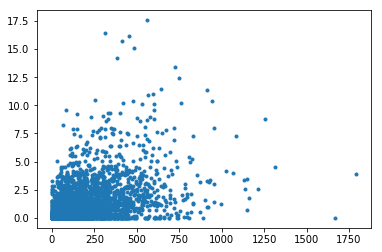

In [40]:
plt.plot(df_16_all.crime_rate_per_100000, df_16_all.eviction_rate,'.')
np.corrcoef(df_16_all.crime_rate_per_100000, df_16_all.eviction_rate)

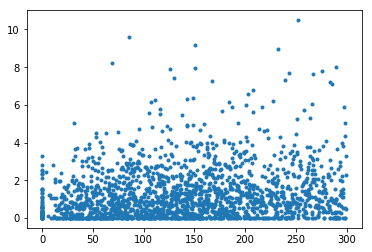

In [42]:
plt.plot(df_16_all['crime_rate_per_100000'].where(df_16_all.crime_rate_per_100000<300),\
         df_16_all['eviction_rate'].where(df_16_all.crime_rate_per_100000<300), '.')

array([[1.        , 0.38268377],
       [0.38268377, 1.        ]])

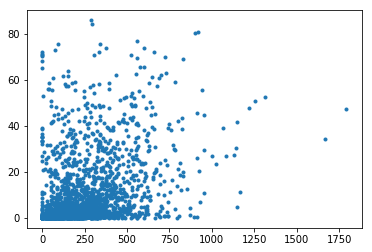

In [43]:
plt.plot(df_16_all.crime_rate_per_100000, df_16_all.pct_af_am,'.')
np.corrcoef(df_16_all.crime_rate_per_100000, df_16_all.pct_af_am)